# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 254 (delta 0), reused 1 (delta 0), pack-reused 252
Receiving objects: 100% (254/254), 41.05 MiB | 23.04 MiB/s, done.
Resolving deltas: 100% (123/123), done.
Updating files: 100% (51/51), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

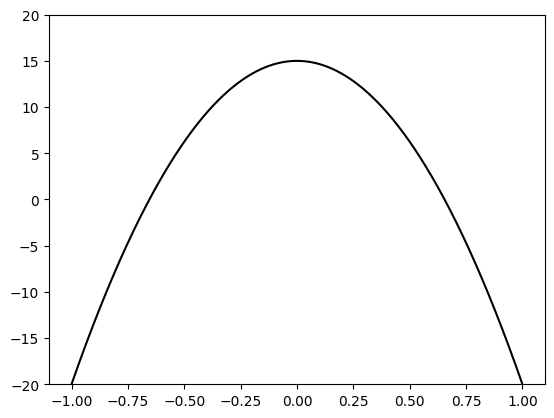

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

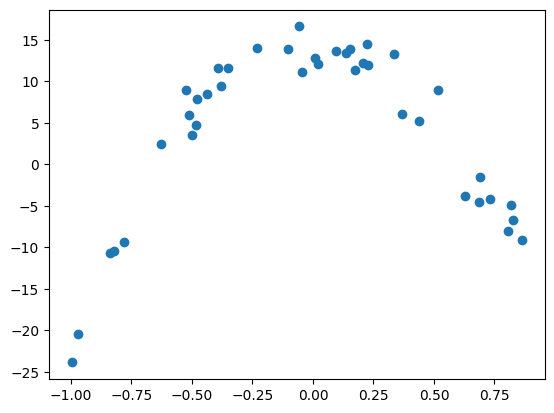

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [7]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(200,include_bias=False)
    X=poly.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)

In [8]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)

In [10]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [11]:
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_train, y_train)

LinearRegression()

Training error (rmse): 0.35604893699065315
Testing error (rmse): 29692352148926.438


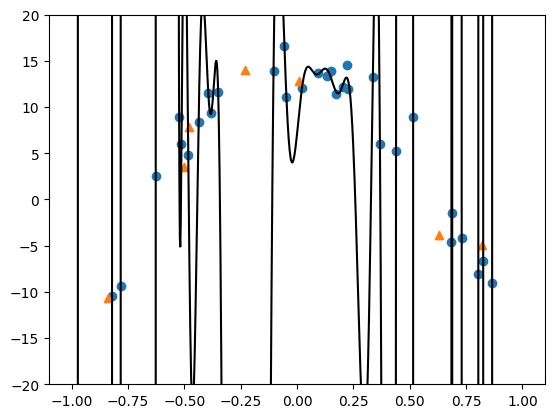

Polynomial coefficients
[7.0330508843434885, 234.20862723703314, 1778.378953911437, -113164.91332200052, 556950.938150743, 10566735.319297723, -91354693.39002205, -198394888.62532702, 3361374201.119273, -154791606.7787502, -59959562643.59238, 43898156803.54755, 625818335666.9421, -588055822201.0377, -4079326059313.4375, 3827128559272.078, 16712004110562.586, -13934079151128.21, -40958033139764.34, 27342555737961.99, 50514020215371.84, -20547782838697.777, -8066314907776.466, -13205121849879.139, -34333045601024.1, 16482294487594.396, -3811268201639.006, 18802686589488.53, 22153644567250.723, 256524324160.17184, 20965280278403.95, -16147489906701.918, 5300071578906.255, -19478056162667.895, -8570598383926.904, -11731556437607.908, -13988932351865.941, 343504690474.02716, -12197395734021.633, 10933075949118.67, -7150126856566.268, 17183634050848.102, -2131329074679.1975, 18633153845265.65, 1143052215729.48, 16349512167899.023, 2385150548818.2417, 11825980943798.3, 2032062098824.574, 6460

In [12]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [13]:
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.1)
model_L1_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

Training error (rmse): 2.023859687656926
Testing error (rmse): 2.7190522218833926


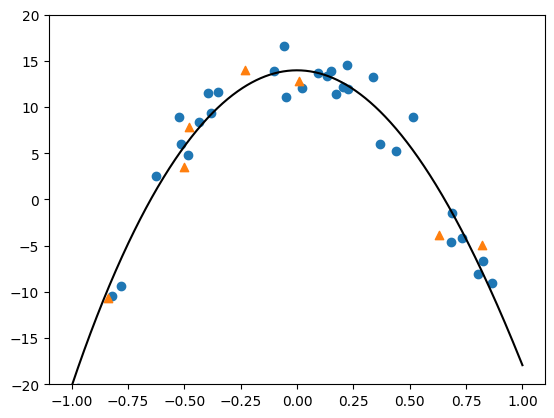

Polynomial coefficients
[13.978697772890351, 0.0, -32.77741001351258, 0.0, -0.2930608761340224, 1.1601732135131915, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0

In [14]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [15]:
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.1)
model_L2_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

Training error (rmse): 1.8598016549858378
Testing error (rmse): 6.142551288550046


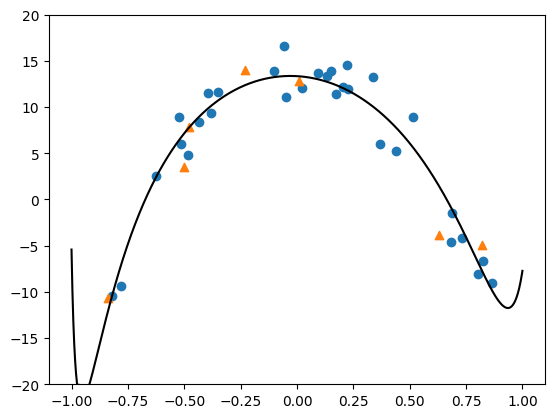

Polynomial coefficients
[13.347417435247964, -1.4000431974295147, -23.73979590649779, 0.5005413202597886, -11.434619419763127, 2.4181260985946222, -4.593924231066938, 2.678649337150013, -1.208300373739155, 2.260635914517297, 0.39117182484996404, 1.6627563137692123, 1.0802021389253438, 1.0961973435455523, 1.3165411168956132, 0.6320571547952004, 1.337871355593411, 0.2792342173068316, 1.265340955510109, 0.023288990812764476, 1.1589713011655682, -0.1559431778917183, 1.0471860832990945, -0.2773602117681203, 0.942373640207887, -0.3564430180283945, 0.8489986184730688, -0.40509187857493917, 0.7677815238751833, -0.4321479202502531, 0.6978187656899104, -0.4440538531389283, 0.6376308956597041, -0.4454523211473531, 0.5856577236350212, -0.43966679660629393, 0.54047202785175, -0.42906666192300524, 0.5008537374732811, -0.4153360871121143, 0.46579815449706435, -0.39966878578165227, 0.43449582580303303, -0.3829078372138782, 0.4063027868964053, -0.3656456478974573, 0.3807100425653138, -0.348295319137968

In [16]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [17]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-0.479015,7.824063,-2.704954e+00,6.413044,7.775313
1,0.628934,-3.833775,-2.337019e+05,1.081658,1.499602
2,-0.498987,3.511212,3.240926e+01,5.763447,7.188472
3,-0.839108,-10.658485,-2.681552e+09,-9.727887,-12.160699
4,0.819493,-4.879956,-3.462822e+06,-7.736940,-7.650150
5,-0.230198,14.057973,-1.000271e+03,12.240218,12.371142
6,-0.997714,-23.858803,8.398265e+13,-20.086415,-8.147978
7,0.009374,12.810729,9.296510e+00,13.975818,13.332208


### Real Example (Predict fuel efficiency)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [20]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [21]:
from sklearn.preprocessing import normalize

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_trainPoly=normalize(addPoly(X_train,50),axis=0)
X_testPoly=normalize(addPoly(X_test,50),axis=0)

##### no regularization

In [22]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

1289279.7907303446


##### lasso regularization

In [23]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

8.1098592143875


##### ridge regularization

In [24]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

7.768630332120947
